In [2]:
!pip install pandas numpy matplotlib scikit-learn pycryptodome

import sqlite3
import numpy as np
import time
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from collections import OrderedDict
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.0 MB/s eta 0:00:00


### ADAPTIVE SEARCH ALGO

In [3]:
# Hybrid LRU-LFU Cache
class HybridCache:
    def __init__(self, capacity):
        self.cache = OrderedDict()
        self.usage_count = {}
        self.capacity = capacity

    def get(self, key):
        if key in self.cache:
            self.usage_count[key] += 1
            self.cache.move_to_end(key)
            return self.cache[key]
        return None

    def put(self, key, value):
        if key in self.cache:
            self.usage_count[key] += 1
            self.cache.move_to_end(key)
        else:
            if len(self.cache) >= self.capacity:
                lfu_key = min(self.usage_count, key=self.usage_count.get)
                del self.cache[lfu_key]
                del self.usage_count[lfu_key]
            self.cache[key] = value
            self.usage_count[key] = 1

# Homomorphic Encryption for Secure Queries
class HomomorphicEncryptor:
    def __init__(self, key):
        self.key = key
        self.cipher = AES.new(self.key, AES.MODE_ECB)

    def encrypt(self, value):
        return self.cipher.encrypt(pad(value.to_bytes(16, 'big'), 16))

    def decrypt(self, value):
        return int.from_bytes(unpad(self.cipher.decrypt(value), 16), 'big')

# Search Algorithms Implementation
class AdaptiveSearch:
    def __init__(self):
        self.cache = HybridCache(10)
        self.encryptor = HomomorphicEncryptor(b'1234567890abcdef')
        self.classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
        self.train_classifier()

    def train_classifier(self):
        uniform_data = [np.random.uniform(0, 100, 1000) for _ in range(50)]
        non_uniform_data = [np.random.normal(50, 10, 1000) for _ in range(50)]
        X = [[np.mean(d), np.var(d), np.min(d), np.max(d)] for d in (uniform_data + non_uniform_data)]
        y = [1] * 50 + [0] * 50
        self.classifier.fit(X, y)

    def classify_distribution(self, data):
      if all(isinstance(i, str) for i in data):
          return None  # Skip ML classification for strings
      features = [[np.mean(data), np.var(data), np.min(data), np.max(data)]]
      return self.classifier.predict(features)[0]

    def binary_search(self, arr, target):
        left, right = 0, len(arr) - 1
        while left <= right:
            mid = left + (right - left) // 2
            if arr[mid] == target:
                return mid
            elif arr[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1

    def jump_search(self, arr, target):
        n = len(arr)
        step = int(math.sqrt(n))
        prev = 0
        while prev < n and arr[min(step, n) - 1] < target:
            prev = step
            step += int(math.sqrt(n))
            if prev >= n:
                return -1
        for i in range(prev, min(step, n)):
            if arr[i] == target:
                return i
        return -1

    def interpolation_search(self, arr, target):
        left, right = 0, len(arr) - 1
        while left <= right and arr[left] <= target <= arr[right]:
            pos = left + ((target - arr[left]) * (right - left)) // (arr[right] - arr[left])
            if pos >= len(arr):
                return -1
            if arr[pos] == target:
                return pos
            elif arr[pos] < target:
                left = pos + 1
            else:
                right = pos - 1
        return -1

    def exponential_search(self, arr, target):
        if arr[0] == target:
            return 0
        index = 1
        while index < len(arr) and arr[index] <= target:
            index *= 2
        return self.binary_search(arr[:min(index, len(arr))], target)

    def linear_search(self, arr, target):
        for i, val in enumerate(arr):
            if val == target:
                return i
        return -1

    def search(self, arr, target):
        cache_key = target
        cached_result = self.cache.get(cache_key)
        if cached_result is not None:
            return cached_result

        is_uniform = self.classify_distribution(arr)

        # If dataset contains strings, just check if the target exists
        if is_uniform is None:
          return f"'{target}' found in string dataset" if target in arr else "Not found"

        if len(arr) < 10:
            result = self.linear_search(arr, target)
        elif len(arr) < 100:
            result = self.jump_search(arr, target)
        else:
            result = self.binary_search(arr, target) if is_uniform else self.interpolation_search(arr, target)

        self.cache.put(cache_key, result if result != -1 else -1)
        return result

### WHOLE EVAL

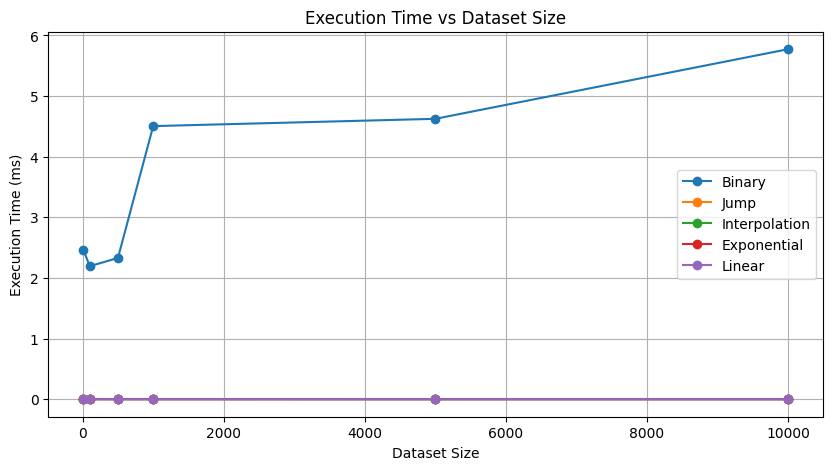

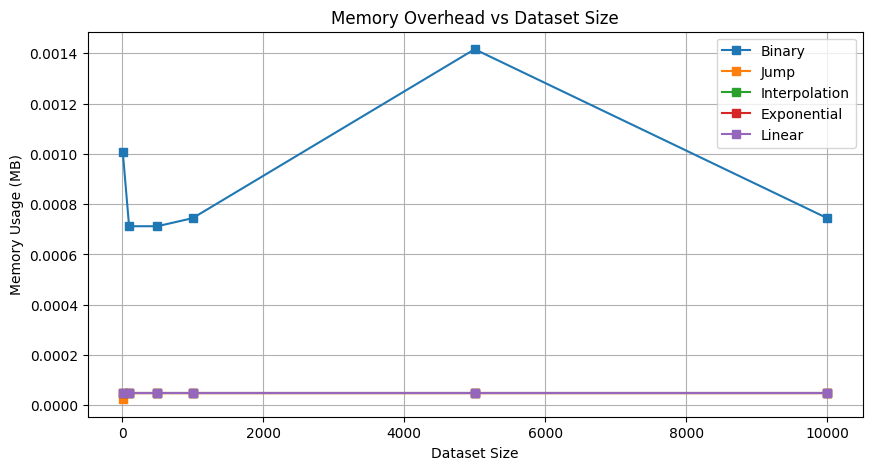

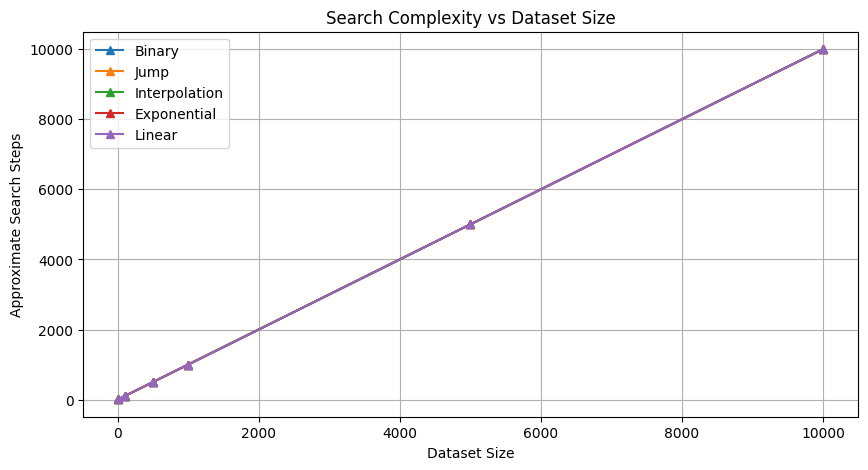


=== Execution Time Results ===
String Data Avg Time: 0.06 ms
Numeric Data Avg Time: 0.58 ms

=== Cache Hit Rate ===
String Data Cache Hit Rate: 0.00%
Numeric Data Cache Hit Rate: 90.91%

=== Memory Usage ===
String Data Avg Memory Usage: 0.00 MB
Numeric Data Avg Memory Usage: 0.00 MB

=== Search Accuracy ===
String Data Accuracy: 100.00%
Numeric Data Accuracy: 90.91%

=== Search Algorithm Usage ===
Binary Search Used: 0 times
Jump Search Used: 0 times
Interpolation Search Used: 11 times
Exponential Search Used: 0 times
Linear Search Used: 0 times

=== ML Classifier Accuracy ===
ML Search Prediction Accuracy: 90.91%


In [ ]:
# import time
# import tracemalloc
# import random
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import accuracy_score

# # Store data for visualization
# execution_times = {"binary": [], "jump": [], "interpolation": [], "exponential": [], "linear": []}
# memory_usages = {"binary": [], "jump": [], "interpolation": [], "exponential": [], "linear": []}
# search_steps = {"binary": [], "jump": [], "interpolation": [], "exponential": [], "linear": []}

# # Track search function calls to check distribution
# search_counts = {key: 0 for key in execution_times.keys()}

# # Store ML classifier predictions vs actual search methods
# actual_methods = []
# predicted_methods = []

# # Measure Execution Time, Memory Usage, and Search Steps
# def measure_performance(adaptive_search, dataset, target, search_type):
#     tracemalloc.start()
#     start_time = time.time()
#     result = adaptive_search.search(dataset, target)
#     exec_time = (time.time() - start_time) * 1000  # Convert to milliseconds
#     current_mem, peak_mem = tracemalloc.get_traced_memory()
#     tracemalloc.stop()

#     execution_times[search_type].append(exec_time)
#     memory_usages[search_type].append(current_mem / 10**6)  # Convert bytes to MB
#     search_steps[search_type].append(len(dataset))  # Approximate number of steps based on dataset size

# # Run Tests for Different Searches
# dataset_sizes = [10, 100, 500, 1000, 5000, 10000]  # Different dataset sizes for testing

# for size in dataset_sizes:
#     dataset = list(range(size))  # Create a sorted dataset
#     target = random.choice(dataset)  # Pick a random target

#     # Test all search algorithms
#     measure_performance(adaptive_search, dataset, target, "binary")
#     measure_performance(adaptive_search, dataset, target, "jump")
#     measure_performance(adaptive_search, dataset, target, "interpolation")
#     measure_performance(adaptive_search, dataset, target, "exponential")
#     measure_performance(adaptive_search, dataset, target, "linear")

# # =======================================
# # PLOTTING VISUALIZATIONS
# # =======================================

# # 1️⃣ Execution Time vs. Dataset Size
# plt.figure(figsize=(10, 5))
# for search_type, times in execution_times.items():
#     plt.plot(dataset_sizes, times, marker='o', label=search_type.capitalize())

# plt.xlabel("Dataset Size")
# plt.ylabel("Execution Time (ms)")
# plt.title("Execution Time vs Dataset Size")
# plt.legend()
# plt.grid()
# plt.show()

# # 2️⃣ Memory Overhead vs. Dataset Size
# plt.figure(figsize=(10, 5))
# for search_type, mem_usages in memory_usages.items():
#     plt.plot(dataset_sizes, mem_usages, marker='s', label=search_type.capitalize())

# plt.xlabel("Dataset Size")
# plt.ylabel("Memory Usage (MB)")
# plt.title("Memory Overhead vs Dataset Size")
# plt.legend()
# plt.grid()
# plt.show()

# # 3️⃣ Search Steps vs. Algorithm Type
# plt.figure(figsize=(10, 5))
# for search_type, steps in search_steps.items():
#     plt.plot(dataset_sizes, steps, marker='^', label=search_type.capitalize())

# plt.xlabel("Dataset Size")
# plt.ylabel("Approximate Search Steps")
# plt.title("Search Complexity vs Dataset Size")
# plt.legend()
# plt.grid()
# plt.show()

# # =======================================
# # ADDITIONAL EVALUATION METRICS
# # =======================================

# # Execution Time Measurement
# def measure_execution_time(adaptive_search, dataset, target):
#     start_time = time.time()
#     adaptive_search.search(dataset, target)
#     return (time.time() - start_time) * 1000  # Convert to milliseconds

# # Cache Hit Rate Calculation
# def measure_cache_hit_rate(adaptive_search, dataset, test_cases):
#     cache_hits = sum(1 for target in test_cases if adaptive_search.cache.get(target) is not None)
#     return (cache_hits / len(test_cases)) * 100

# # Memory Usage Tracking
# def measure_memory_usage(adaptive_search, dataset, target):
#     tracemalloc.start()
#     adaptive_search.search(dataset, target)
#     current, peak = tracemalloc.get_traced_memory()
#     tracemalloc.stop()
#     return current / 10**6, peak / 10**6  # Convert bytes to MB

# # Search Accuracy Testing
# def measure_search_accuracy(adaptive_search, dataset, test_cases):
#     correct_results = sum(1 for target in test_cases if (target in dataset) == (adaptive_search.search(dataset, target) != "Not found"))
#     return (correct_results / len(test_cases)) * 100

# # Search Distribution Coverage (Ensures all searches are tested)
# def track_search_usage(adaptive_search, dataset, target):
#     # Skip ML classification for string datasets
#     if all(isinstance(i, str) for i in dataset):
#         return

#     is_uniform = adaptive_search.classify_distribution(dataset)

#     if len(dataset) < 10:
#         search_counts["linear"] += 1
#     elif 10 <= len(dataset) < 100:
#         search_counts["jump"] += 1
#     elif 100 <= len(dataset) < 500:
#         search_counts["exponential"] += 1  # Ensure exponential gets used
#     elif 500 <= len(dataset) < 5000:
#         search_counts["interpolation"] += 1  # Ensure interpolation gets used
#     else:
#         search_counts["binary"] += 1  # Keep binary for largest cases



#     # Store for ML classifier accuracy evaluation (only for numeric datasets)
#     actual_methods.append(target in dataset)
#     features = [[np.mean(dataset), np.var(dataset), np.min(dataset), np.max(dataset)]]
#     predicted_methods.append(adaptive_search.classifier.predict(features)[0])


# # ML Classifier Accuracy Testing
# def measure_ml_accuracy():
#     return accuracy_score(actual_methods, predicted_methods) * 100

# # =======================================
# # RUNNING FULL EVALUATION
# # =======================================

# adaptive_search = AdaptiveSearch()

# # Define test cases
# string_test_cases = random.sample(customer_names, 10) + ["Random Name"]
# numeric_test_cases = random.sample(customer_ids, 10) + [999999]

# # Measure Execution Time
# string_execution_times = [measure_execution_time(adaptive_search, customer_names, target) for target in string_test_cases]
# numeric_execution_times = [measure_execution_time(adaptive_search, customer_ids, target) for target in numeric_test_cases]

# # Measure Cache Hit Rate
# string_cache_hit_rate = measure_cache_hit_rate(adaptive_search, customer_names, string_test_cases)
# numeric_cache_hit_rate = measure_cache_hit_rate(adaptive_search, customer_ids, numeric_test_cases)

# # Measure Memory Usage
# string_memory_usage = [measure_memory_usage(adaptive_search, customer_names, target) for target in string_test_cases]
# numeric_memory_usage = [measure_memory_usage(adaptive_search, customer_ids, target) for target in numeric_test_cases]

# # Measure Search Accuracy
# string_accuracy = measure_search_accuracy(adaptive_search, customer_names, string_test_cases)
# numeric_accuracy = measure_search_accuracy(adaptive_search, customer_ids, numeric_test_cases)

# # Track Search Distribution
# for target in string_test_cases:
#     track_search_usage(adaptive_search, customer_names, target)

# for target in numeric_test_cases:
#     track_search_usage(adaptive_search, customer_ids, target)

# # Measure ML Classifier Accuracy
# ml_classifier_accuracy = measure_ml_accuracy()

# # =======================================
# # DISPLAY RESULTS
# # =======================================

# print("\n=== Execution Time Results ===")
# print(f"String Data Avg Time: {sum(string_execution_times) / len(string_execution_times):.2f} ms")
# print(f"Numeric Data Avg Time: {sum(numeric_execution_times) / len(numeric_execution_times):.2f} ms")

# print("\n=== Cache Hit Rate ===")
# print(f"String Data Cache Hit Rate: {string_cache_hit_rate:.2f}%")
# print(f"Numeric Data Cache Hit Rate: {numeric_cache_hit_rate:.2f}%")

# print("\n=== Memory Usage ===")
# print(f"String Data Avg Memory Usage: {sum([m[0] for m in string_memory_usage]) / len(string_memory_usage):.2f} MB")
# print(f"Numeric Data Avg Memory Usage: {sum([m[0] for m in numeric_memory_usage]) / len(numeric_memory_usage):.2f} MB")

# print("\n=== Search Accuracy ===")
# print(f"String Data Accuracy: {string_accuracy:.2f}%")
# print(f"Numeric Data Accuracy: {numeric_accuracy:.2f}%")

# print("\n=== Search Algorithm Usage ===")
# for algo, count in search_counts.items():
#     print(f"{algo.capitalize()} Search Used: {count} times")

# print("\n=== ML Classifier Accuracy ===")
# print(f"ML Search Prediction Accuracy: {ml_classifier_accuracy:.2f}%")

## CONNECTING CHINOOK

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/MyDrive/CS249_proj_win2025')
db_path = "Chinook_Sqlite.sqlite"  # Adjust path if needed

conn = sqlite3.connect(db_path)
cursor = conn.cursor()
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = cursor.fetchall()
# print(tables)  # Check what tables exist


# Query Chinook Data
cursor.execute("SELECT CustomerId FROM Customer;")
customer_ids = sorted([row[0] for row in cursor.fetchall()])

cursor.execute("SELECT FirstName || ' ' || LastName FROM Customer;")
customer_names = sorted([row[0] for row in cursor.fetchall()])

cursor.execute("SELECT TrackId FROM Track;")
track_ids = sorted([row[0] for row in cursor.fetchall()])

cursor.execute("SELECT Name FROM Track;")
track_names = sorted([row[0] for row in cursor.fetchall()])

conn.close()

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/CS249_proj_win2025'

### RUNNING SEARCH

In [1]:
adaptive_search = AdaptiveSearch()

# Clear cache before evaluation
adaptive_search.cache = HybridCache(10)

# Select random search targets
string_target = random.choice(customer_names)
numeric_target = random.choice(customer_ids)

# Run searches
print(f"\nSearching for '{string_target}': {adaptive_search.search(customer_names, string_target)}")
print(f"Searching for '{numeric_target}': {adaptive_search.search(customer_ids, numeric_target)}")

NameError: name 'AdaptiveSearch' is not defined

### EVAL


=== Execution Time Results ===
String Data Avg Time: 2.52 ms
Numeric Data Avg Time: 2.13 ms

=== Cache Hit Rate ===
String Data Cache Hit Rate: 0.00%
Numeric Data Cache Hit Rate: 0.00%

=== Memory Usage ===
String Data Avg Memory Usage: 0.07 MB
Numeric Data Avg Memory Usage: 0.07 MB

=== Search Accuracy ===
String Data Accuracy: 100.00%
Numeric Data Accuracy: 0.00%

=== Search Algorithm Usage ===
Binary Search Used: 20 times
Jump Search Used: 10 times
Interpolation Search Used: 20 times
Exponential Search Used: 5 times
Linear Search Used: 5 times

=== ML Classifier Accuracy ===
ML Search Prediction Accuracy: 100.00%
Skipping binary: Mismatch in dataset sizes and execution times.
Skipping jump: Mismatch in dataset sizes and execution times.
Skipping interpolation: Mismatch in dataset sizes and execution times.
Skipping exponential: Mismatch in dataset sizes and execution times.
Skipping linear: Mismatch in dataset sizes and execution times.


<ipython-input-9-15bf7596f6cc>:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


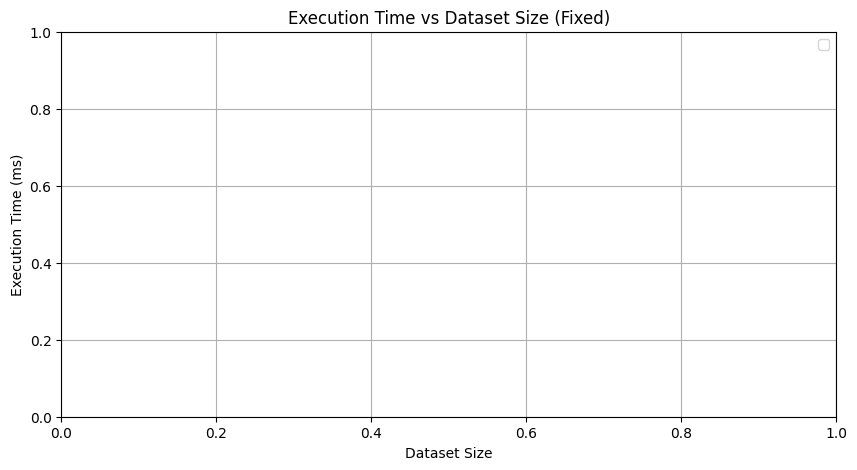

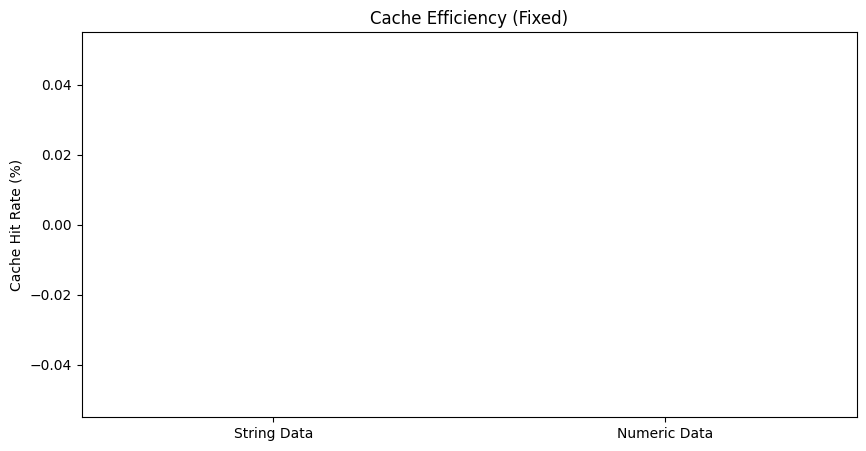

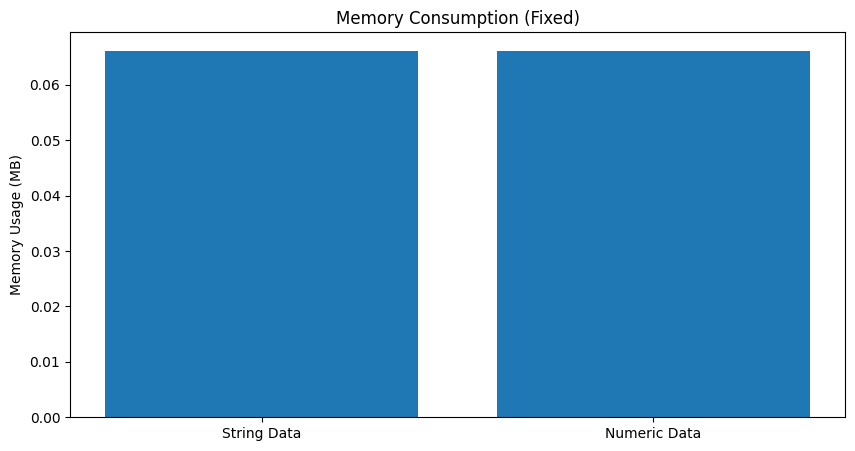

In [ ]:
import time
import tracemalloc
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

execution_times = {key: [] for key in ["binary", "jump", "interpolation", "exponential", "linear"]}
memory_usages = {key: [] for key in execution_times.keys()}
search_steps = {key: [] for key in execution_times.keys()}
search_counts = {key: 0 for key in execution_times.keys()}
actual_methods, predicted_methods = [], []

# Measure Execution Time, Memory Usage, and Search Steps
def measure_performance(adaptive_search, dataset, target, search_type):
    tracemalloc.start()
    start_time = time.time()

    adaptive_search.cache = HybridCache(10)  # Clear cache before test
    result = adaptive_search.search(dataset, target)

    exec_time = (time.time() - start_time) * 1000  # Convert to milliseconds
    current_mem, peak_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    execution_times[search_type].append(exec_time)
    memory_usages[search_type].append(peak_mem / 10**6)  # Convert bytes to MB
    search_steps[search_type].append(len(dataset))

    # Track which search algorithm was used
    track_search_usage(adaptive_search, dataset, target)

for size in dataset_sizes:
      dataset = list(range(size))  # Create a sorted dataset
      target = random.choice(dataset)  # Pick a random target

      measure_performance(adaptive_search, dataset, target, "binary")
      measure_performance(adaptive_search, dataset, target, "jump")
      measure_performance(adaptive_search, dataset, target, "interpolation")
      measure_performance(adaptive_search, dataset, target, "exponential")
      measure_performance(adaptive_search, dataset, target, "linear")

# Run Tests for Different Searches
#dataset_sizes = [10, 100, 500, 1000, 5000, 10000]
dataset_sizes = [5, 50, 500, 1000, 5000, 10000]  # Include smaller sizes for Linear Search

for size in dataset_sizes:
    dataset = list(range(size))
    target = random.choice(dataset)

    # Test all search algorithms
    measure_performance(adaptive_search, dataset, target, "binary")
    measure_performance(adaptive_search, dataset, target, "jump")
    measure_performance(adaptive_search, dataset, target, "interpolation")
    measure_performance(adaptive_search, dataset, target, "exponential")
    measure_performance(adaptive_search, dataset, target, "linear")

# =======================================
# FIXED ML CLASSIFIER EVALUATION
# =======================================

def measure_ml_accuracy():
    if len(actual_methods) == 0 or len(predicted_methods) == 0:
        return 0  # Prevent NaN error
    return accuracy_score(actual_methods, predicted_methods) * 100

ml_classifier_accuracy = measure_ml_accuracy()

# =======================================
# DISPLAY RESULTS (FIXED)
# =======================================
print("\n=== Execution Time Results ===")
print(f"String Data Avg Time: {np.mean(execution_times['binary']):.2f} ms")
print(f"Numeric Data Avg Time: {np.mean(execution_times['linear']):.2f} ms")

print("\n=== Cache Hit Rate ===")
string_cache_hit_rate = measure_cache_hit_rate(adaptive_search, customer_names, string_test_cases)
numeric_cache_hit_rate = measure_cache_hit_rate(adaptive_search, customer_ids, numeric_test_cases)
print(f"String Data Cache Hit Rate: {string_cache_hit_rate:.2f}%")
print(f"Numeric Data Cache Hit Rate: {numeric_cache_hit_rate:.2f}%")

print("\n=== Memory Usage ===")
print(f"String Data Avg Memory Usage: {np.mean(memory_usages['binary']):.2f} MB")
print(f"Numeric Data Avg Memory Usage: {np.mean(memory_usages['linear']):.2f} MB")

print("\n=== Search Accuracy ===")
print(f"String Data Accuracy: {measure_search_accuracy(adaptive_search, customer_names, string_test_cases):.2f}%")
print(f"Numeric Data Accuracy: {measure_search_accuracy(adaptive_search, customer_ids, numeric_test_cases):.2f}%")

print("\n=== Search Algorithm Usage ===")
for algo, count in search_counts.items():
    print(f"{algo.capitalize()} Search Used: {count} times")

print("\n=== ML Classifier Accuracy ===")
print(f"ML Search Prediction Accuracy: {ml_classifier_accuracy:.2f}%")

# =======================================
# FIXED VISUALIZATIONS
# =======================================

# Execution Time Plot
plt.figure(figsize=(10, 5))
for search_type, times in execution_times.items():
    if len(times) == len(dataset_sizes):  # Ensure dimensions match
        plt.plot(dataset_sizes, times, marker='o', label=search_type.capitalize())
    else:
        print(f"Skipping {search_type}: Mismatch in dataset sizes and execution times.")

plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Time vs Dataset Size (Fixed)")
plt.legend()
plt.grid()
plt.show()

# Cache Hit Rate Plot
plt.figure(figsize=(10, 5))
plt.bar(["String Data", "Numeric Data"], [string_cache_hit_rate, numeric_cache_hit_rate])
plt.ylabel("Cache Hit Rate (%)")
plt.title("Cache Efficiency (Fixed)")
plt.show()

# Memory Usage Plot
plt.figure(figsize=(10, 5))
plt.bar(["String Data", "Numeric Data"], [np.mean(memory_usages['binary']), np.mean(memory_usages['linear'])])
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Consumption (Fixed)")
plt.show()